<a href="https://colab.research.google.com/github/angelafrocha/ProjetoSoulcode/blob/main/final_frota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise das Frotas de veículos

##Instalações de bibliotecas

In [ ]:
pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 21.2 MB/s eta 0:00:00


In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.9 MB/s eta 0:00:00


In [ ]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 3.7 MB/s eta 0:00:00


##Importações das Libs

In [ ]:
import pymongo
import pandas as pd
import os
import numpy as np
import pandera as pa
import matplotlib.pyplot as plt
import pymongo
from pymongo import MongoClient
from google.cloud import storage

##Conexão GCP e MongoDB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)
serviceAccount = '/content/spry-ether-382812-774986df1787.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('projetofinal1')
bucket.blob('f_frota_por_uf_municipio_ano_fab_mod_marco_2023.xlsx')
path = 'gs://projetofinal1/brutos/f_frota_por_uf_municipio_ano_fab_mod_marco_2023.xlsx'

In [ ]:
# Espaço para o Mongo DB

In [ ]:
uri = "mongodb+srv://clustere5.wjshwzt.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/drive/MyDrive/key_pf/acessoPatricia.pem',
                     )
db = client['frota']
colecao_tratado = db['tratado']

In [ ]:
colecao_tratado.count_documents({})

##Extração dos dados brutos

In [ ]:
df = pd.read_excel(path)

##Pré-Análise

In [ ]:
df.head()

,UF,Município,Ano Modelo,Ano Fabricação CRV,Qtd. Veículos
0,ACRE,ACRELANDIA,1959,1959,1
1,ACRE,ACRELANDIA,1967,1967,1
2,ACRE,ACRELANDIA,1970,1970,2
3,ACRE,ACRELANDIA,1971,1971,1
4,ACRE,ACRELANDIA,1972,1972,4


In [ ]:
#Fazendo o backup de segurança
df_bkp = df.copy()

In [ ]:
df.dtypes

UF                    object
Município             object
Ano Modelo            object
Ano Fabricação CRV    object
Qtd. Veículos          int64
dtype: object

In [ ]:
df.shape

(640507, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640507 entries, 0 to 640506
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   UF                  640507 non-null  object
 1   Município           640507 non-null  object
 2   Ano Modelo          640507 non-null  object
 3   Ano Fabricação CRV  640507 non-null  object
 4   Qtd. Veículos       640507 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 24.4+ MB


In [ ]:
df.columns

Index(['UF', 'Município', 'Ano Modelo', 'Ano Fabricação CRV', 'Qtd. Veículos'], dtype='object')

In [ ]:
df.nunique()

UF                      30
Município             5290
Ano Modelo             132
Ano Fabricação CRV     127
Qtd. Veículos         6615
dtype: int64

In [ ]:
df.UF.is_unique

False

##Transformações

In [ ]:
#Novo backup de segurança
df_bkp = df.copy()

In [ ]:
df.dtypes

UF                    object
Município             object
Ano Modelo            object
Ano Fabricação CRV    object
Qtd. Veículos          int64
dtype: object

In [ ]:
df.duplicated().sum()

0

Renomeando colunas

In [ ]:
df.rename(columns={'Município':'municipio',
                   'uf':'uf',
                   'Ano Modelo':'ano_modelo',
                   'Ano Fabricação CRV':'ano_fab_crv',
                   'Qtd. Veículos':'qnt_veiculos'}, inplace=True)

In [ ]:
#Verificando valores únicos da coluna ano_modelo
df['ano_modelo'].unique()

array(['1959', '1967', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'Sem Informação', '1960', '1964', '1968', '1969', '2024', '1945',
       '1954', '1961', '1962', '1965', '1966', '1963', '1928', '1929',
       '1949', '1951', '1958', '1953', '1926', '1930', '1937', '1939',
       '1942', '1947', '1948', '1950', '1952', '1956', '1957', '1944',
       '1941', '1946', 'Não Identificado', '1940', '1932', '1900', '2803',
       '1931', '2603', '1955', '1938', '1919', '1923', '1927', '1933',
       '1934', '1935', '1943', '1914', '1936', '1925', '1920', '1924',


In [ ]:
# Não usaremos o ano do modelo do carro como referência para nossas análises
df = df.drop(columns=['ano_modelo'])

In [ ]:
df['ano_fab_crv'].unique()

array(['1959', '1967', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', 'Sem Informação', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '1960', '1964', '1968', '1969', '1945', '1954',
       '1961', '1962', '1965', '1966', '1963', '1928', '1929', '1949',
       '1951', '1958', '1953', '1926', '1930', '1937', '1939', '1942',
       '1947', '1948', '1950', '1952', '1956', '1957', '1944', '1941',
       '1946', 'Não Identificado', '1940', '1932', '1931', '1955', '1938',
       '1919', '1923', '1925', '1927', '1933', '1934', '1935', '1943',
       '1914', '1936', '1900', '1920', '1924', '1908', '1912', '1922',


In [ ]:
# A coluna ano fabricação esta no formato string e possuem valores inconsistentes
# Passar os valores para o formato numerico e os incompatíveis para não-numérico
df['ano_fab_crv'] = pd.to_numeric(df['ano_fab_crv'], errors='coerce')

In [ ]:
df['ano_fab_crv'].unique()

array([1959., 1967., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995.,   nan, 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021., 2022., 2023., 1960., 1964., 1968., 1969., 1945., 1954.,
       1961., 1962., 1965., 1966., 1963., 1928., 1929., 1949., 1951.,
       1958., 1953., 1926., 1930., 1937., 1939., 1942., 1947., 1948.,
       1950., 1952., 1956., 1957., 1944., 1941., 1946., 1940., 1932.,
       1931., 1955., 1938., 1919., 1923., 1925., 1927., 1933., 1934.,
       1935., 1943., 1914., 1936., 1900., 1920., 1924., 1908., 1912.,
       1922., 1907., 1910., 1911., 1917., 1921., 1906., 1915., 1918.,
       1916., 1901., 1909., 1903., 1904., 1913., 1902., 1905.])

In [ ]:
# Serão analisados apenas os dados a partir de 2018 e até 2023(para evitar erros)
df = df.loc[(df['ano_fab_crv'] >= 2018) & (df['ano_fab_crv'] < 2024)]

In [ ]:
# Conversão de Float para Inteiro
df['ano_fab_crv'] = df['ano_fab_crv'].astype(int)

<ipython-input-28-9f83721263ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ano_fab_crv'] = df['ano_fab_crv'].astype(int)


In [ ]:
df.dtypes

UF              object
municipio       object
ano_fab_crv      int64
qnt_veiculos     int64
dtype: object

In [ ]:
df.isnull().sum()

UF              0
municipio       0
ano_fab_crv     0
qnt_veiculos    0
dtype: int64

In [ ]:
df.shape

(63968, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63968 entries, 93 to 640505
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UF            63968 non-null  object
 1   municipio     63968 non-null  object
 2   ano_fab_crv   63968 non-null  int64 
 3   qnt_veiculos  63968 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ MB


##Criação do Schema

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'UF':pa.Column(pa.String),
        'ano_fab_crv':pa.Column(pa.Int),
        'qnt_veiculos':pa.Column(pa.Int)
    }
)

In [ ]:
schema.validate(df)

,UF,municipio,ano_fab_crv,qnt_veiculos
93,ACRE,ACRELANDIA,2018,141
94,ACRE,ACRELANDIA,2018,84
95,ACRE,ACRELANDIA,2019,139
96,ACRE,ACRELANDIA,2019,68
97,ACRE,ACRELANDIA,2020,107
...,...,...,...,...
640501,TOCANTINS,XAMBIOA,2021,98
640502,TOCANTINS,XAMBIOA,2021,71
640503,TOCANTINS,XAMBIOA,2022,115
640504,TOCANTINS,XAMBIOA,2022,78


##Análises

In [ ]:
df_bkp = df.copy()

In [ ]:
df.columns

Index(['UF', 'municipio', 'ano_fab_crv', 'qnt_veiculos'], dtype='object')

In [ ]:
df.nunique()

UF                28
municipio       5288
ano_fab_crv        6
qnt_veiculos    2876
dtype: int64

In [ ]:
df.isna().sum()

UF              0
municipio       0
ano_fab_crv     0
qnt_veiculos    0
dtype: int64

In [ ]:
# Os dados "sem informação" serão verificados também na coluna de municípios
df['UF'].value_counts(sort=True)

MINAS GERAIS           9612
SAO PAULO              7732
RIO GRANDE DO SUL      5657
BAHIA                  4744
PARANA                 4539
SANTA CATARINA         3487
GOIAS                  2844
PARAIBA                2457
PIAUI                  2449
MARANHAO               2448
PERNAMBUCO             2153
CEARA                  2082
RIO GRANDE DO NORTE    1876
MATO GROSSO            1641
PARA                   1640
TOCANTINS              1549
RIO DE JANEIRO         1275
ALAGOAS                1157
ESPIRITO SANTO          929
MATO GROSSO DO SUL      919
SERGIPE                 857
AMAZONAS                704
RONDONIA                593
ACRE                    252
AMAPA                   173
RORAIMA                 168
DISTRITO FEDERAL         19
Sem Informação           12
Name: UF, dtype: int64

In [ ]:
df['municipio'].value_counts(sort=True)

BOM JESUS           67
SANTA LUZIA         48
VERA CRUZ           46
SANTA INES          45
SAO FRANCISCO       45
                    ..
PEDRO LAURENTINO     8
UIRAMUTA             8
IPIXUNA              7
RIBEIRA DO PIAUI     7
AFUA                 4
Name: municipio, Length: 5288, dtype: int64

In [ ]:
df.loc[df['municipio'] == 'Não Identificado']

,UF,municipio,ano_fab_crv,qnt_veiculos


In [ ]:
df.loc[df['municipio'] == 'Sem Informação']

,UF,municipio,ano_fab_crv,qnt_veiculos
627602,Sem Informação,Sem Informação,2018,22
627604,Sem Informação,Sem Informação,2018,7
627605,Sem Informação,Sem Informação,2019,21
627607,Sem Informação,Sem Informação,2019,5
627608,Sem Informação,Sem Informação,2020,17
627610,Sem Informação,Sem Informação,2020,5
627611,Sem Informação,Sem Informação,2021,13
627613,Sem Informação,Sem Informação,2021,10
627614,Sem Informação,Sem Informação,2022,23
627616,Sem Informação,Sem Informação,2022,26


In [ ]:
#Verificando municipios que podem estar como "Sem informação"
df_sem_info_municipio = df.loc[df['municipio'] == 'Sem Informação']

In [ ]:
df_sem_info_municipio.shape

(12, 4)

In [ ]:
df_sem_info_municipio

,UF,municipio,ano_fab_crv,qnt_veiculos
627602,Sem Informação,Sem Informação,2018,22
627604,Sem Informação,Sem Informação,2018,7
627605,Sem Informação,Sem Informação,2019,21
627607,Sem Informação,Sem Informação,2019,5
627608,Sem Informação,Sem Informação,2020,17
627610,Sem Informação,Sem Informação,2020,5
627611,Sem Informação,Sem Informação,2021,13
627613,Sem Informação,Sem Informação,2021,10
627614,Sem Informação,Sem Informação,2022,23
627616,Sem Informação,Sem Informação,2022,26


In [ ]:
#Verificando municipios que podem estar como "Sem informação"
df_sem_info_municipio = df.loc[df['municipio'] == 'Sem Informação']

In [ ]:
# Tal qual os estados, são 24 linhas com o dado "sem informação"
df_sem_info_municipio.shape

(12, 4)

In [ ]:
# Tranformação das strings "Sem Informação" para valores nulos
df = df.replace('Sem Informação', np.nan)

In [ ]:
# Exclusão das linhas nulas
df = df.dropna()

In [ ]:
df.shape

(63956, 4)

In [ ]:
df['qnt_veiculos'].sum()

18212441

In [ ]:
df['ano_fab_crv'].value_counts(sort=True)

2022    11580
2021    11480
2020    11465
2018    11296
2019    11281
2023     6854
Name: ano_fab_crv, dtype: int64

##Plotagens

In [ ]:
df['municipio'].value_counts(sort=True).sum()

63956

In [ ]:
df['UF'].value_counts(sort=True)

MINAS GERAIS           9612
SAO PAULO              7732
RIO GRANDE DO SUL      5657
BAHIA                  4744
PARANA                 4539
SANTA CATARINA         3487
GOIAS                  2844
PARAIBA                2457
PIAUI                  2449
MARANHAO               2448
PERNAMBUCO             2153
CEARA                  2082
RIO GRANDE DO NORTE    1876
MATO GROSSO            1641
PARA                   1640
TOCANTINS              1549
RIO DE JANEIRO         1275
ALAGOAS                1157
ESPIRITO SANTO          929
MATO GROSSO DO SUL      919
SERGIPE                 857
AMAZONAS                704
RONDONIA                593
ACRE                    252
AMAPA                   173
RORAIMA                 168
DISTRITO FEDERAL         19
Name: UF, dtype: int64

<Axes: xlabel='Nº DE MUNICÍPIOS', ylabel='UF'>

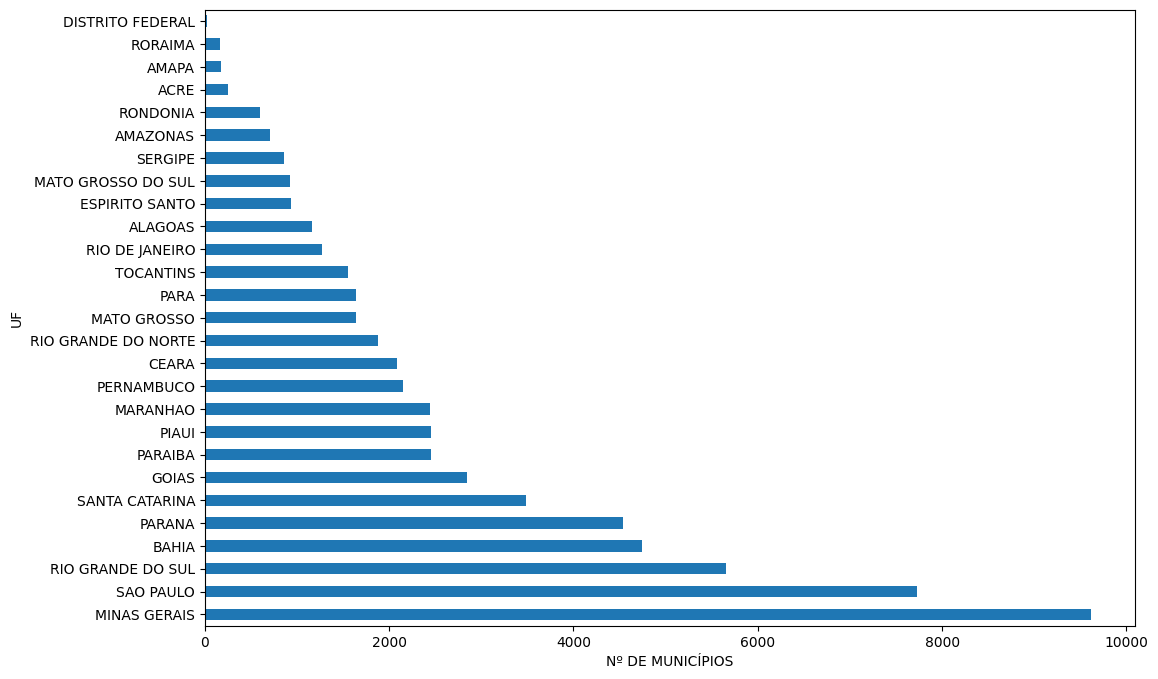

In [ ]:
#QUANTIDADE DE MUNICÍPIOS POR ESTADO
df.groupby(['UF'],dropna=False).size().sort_values(ascending=False).plot.barh(figsize=(12,8),xlabel='Nº DE MUNICÍPIOS',ylabel='UF')

<Axes: xlabel='UF', ylabel='Nº DE VEÍCULOS'>

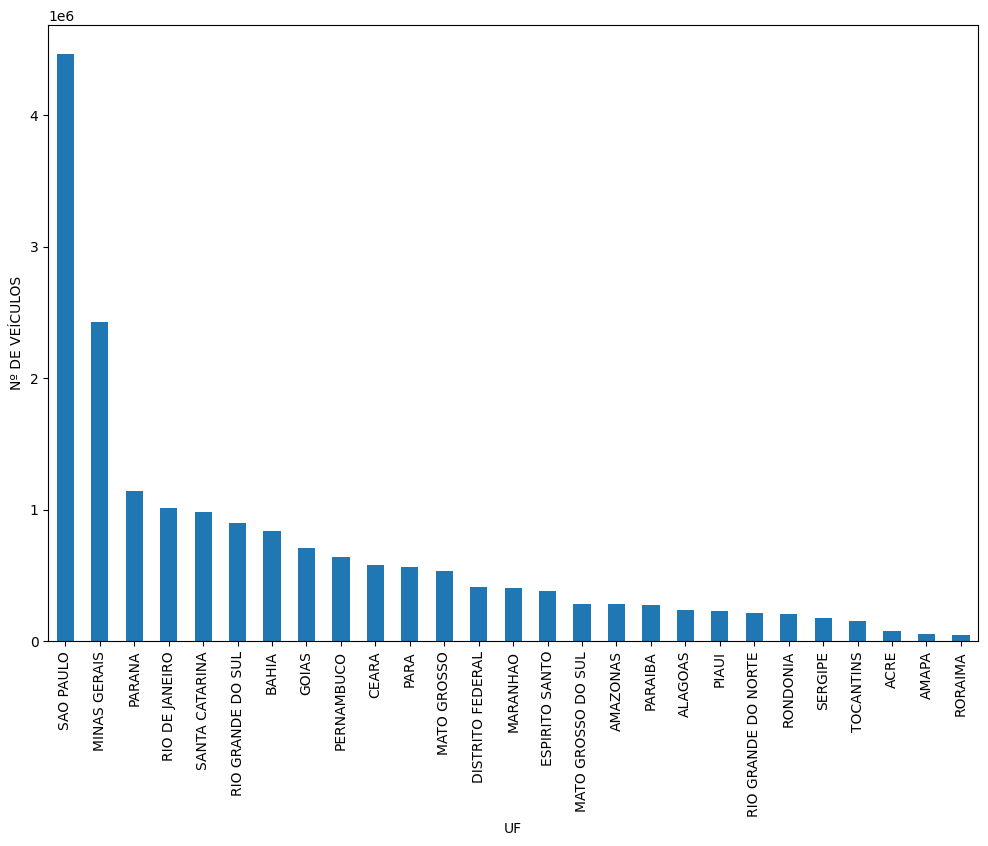

In [ ]:
#QUANTIDADE DE VEÍCULOS POR ESTADO
df.groupby(['UF'])['qnt_veiculos'].sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='UF',ylabel='Nº DE VEÍCULOS')

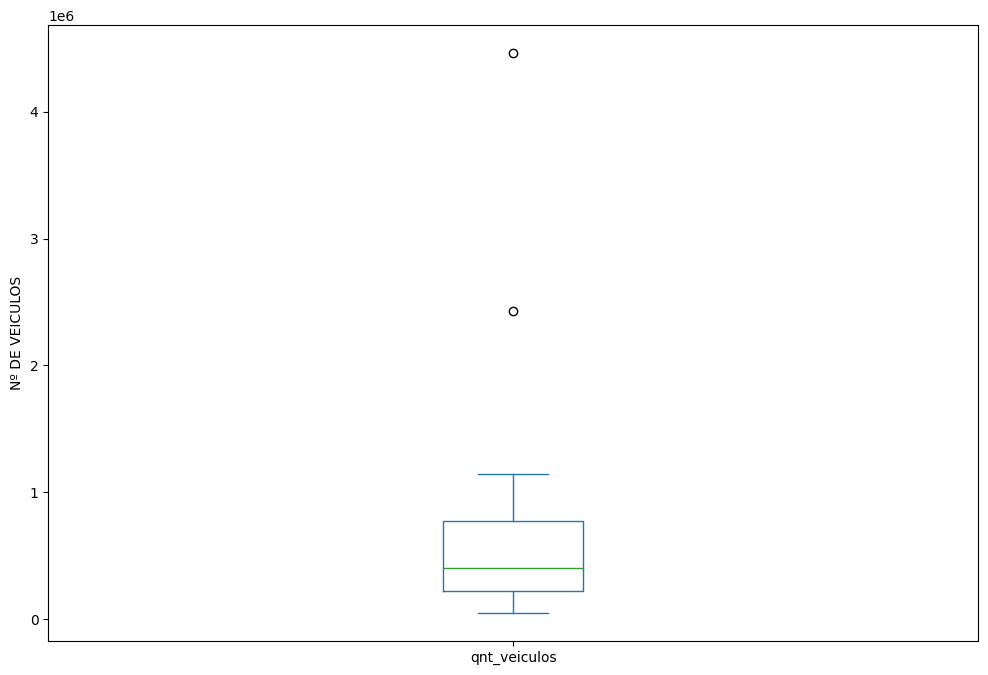

In [ ]:
#DISTRIBUIÇÃO DA QUANTIDADE DE VEÍCULOS

boxplot = df.groupby(['UF'])['qnt_veiculos'].sum().plot(kind='box',
                                                        figsize=(12, 8),
                                                        xlabel='',
                                                        ylabel='Nº DE VEICULOS')


<Axes: xlabel='ANO', ylabel='QUANTIDADE TOTAL'>

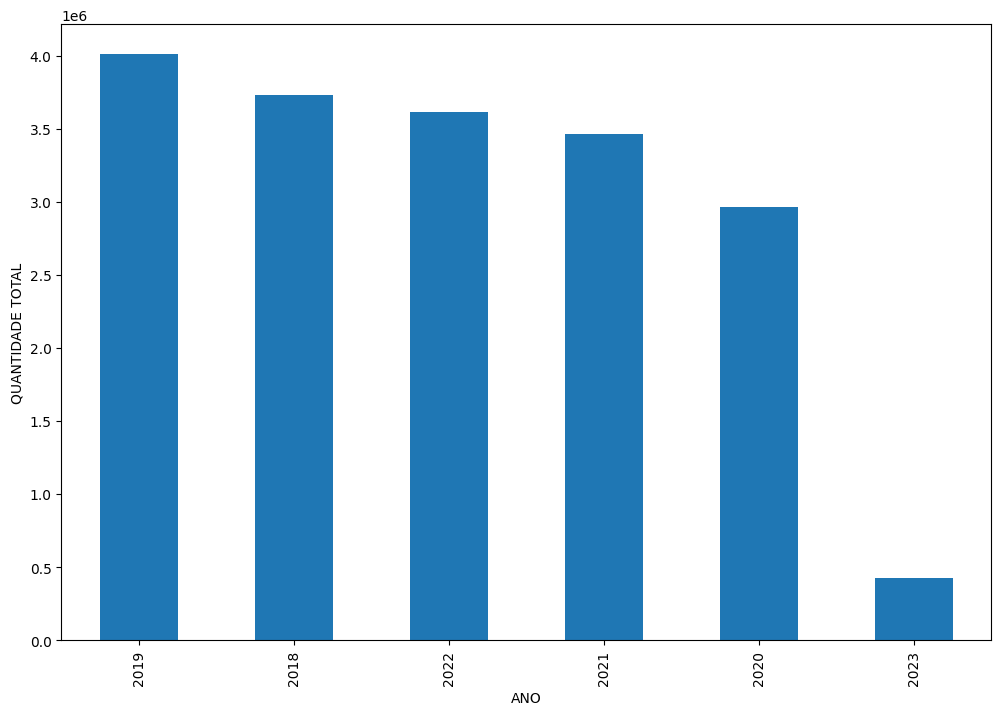

In [ ]:
df.groupby(['ano_fab_crv'])['qnt_veiculos'].sum().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='ANO',ylabel='QUANTIDADE TOTAL')

##Carregamento

In [ ]:
df.to_csv('gs://projetofinal1/tratados/frota.csv',index=False)

In [ ]:
df.to_csv('frota.csv',index=False)

In [ ]:
df.count()

In [ ]:
colecao_tratado.delete_many({})

In [ ]:
#carregando os dados tratados no mongo
colecao_tratado.insert_many(df.to_dict('records'))

In [ ]:
colecao_tratado.count_documents({})